In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder
import numpy as np

data = pd.read_csv('/content/radiomic_features (3).csv')

columns_to_drop = ['Category']
X = data.drop(columns=columns_to_drop)  # Features
y = data['Category']

le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFE(estimator=rf, n_features_to_select=20)
rfe.fit(X_train, y_train)

selected_features_rfe = X.columns[rfe.support_]

print("Top 10 selected features (RFE):")
print(selected_features_rfe)

X_selected = X[selected_features_rfe]
X_selected['Category'] = y

X_selected.to_csv('selected_radiomic_features_rfe.csv', index=False)

print("\nSelected features saved to 'selected_radiomic_features_rfe.csv'")


Top 10 selected features (RFE):
Index(['original_glcm_Correlation', 'original_glcm_Imc2',
       'original_glcm_InverseVariance',
       'original_gldm_LargeDependenceEmphasis',
       'original_gldm_LargeDependenceLowGrayLevelEmphasis',
       'original_glrlm_GrayLevelNonUniformity',
       'original_glrlm_LongRunEmphasis',
       'original_glrlm_LongRunHighGrayLevelEmphasis',
       'original_glrlm_LongRunLowGrayLevelEmphasis',
       'original_glrlm_RunEntropy', 'original_glrlm_RunPercentage',
       'original_glrlm_RunVariance',
       'original_glrlm_ShortRunHighGrayLevelEmphasis',
       'original_glszm_GrayLevelNonUniformity',
       'original_glszm_GrayLevelVariance',
       'original_glszm_SizeZoneNonUniformity', 'original_glszm_ZoneEntropy',
       'original_ngtdm_Busyness', 'original_ngtdm_Coarseness',
       'original_ngtdm_Complexity'],
      dtype='object')

Selected features saved to 'selected_radiomic_features_rfe.csv'


<ipython-input-9-650b56f31190>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_selected['Category'] = y  # Add the target variable to the new DataFrame



Training Logistic Regression...
Accuracy: 0.8667
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       1.00      0.98      0.99       174
           2       0.72      1.00      0.84       116

    accuracy                           0.87       330
   macro avg       0.58      0.66      0.61       330
weighted avg       0.78      0.87      0.82       330



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


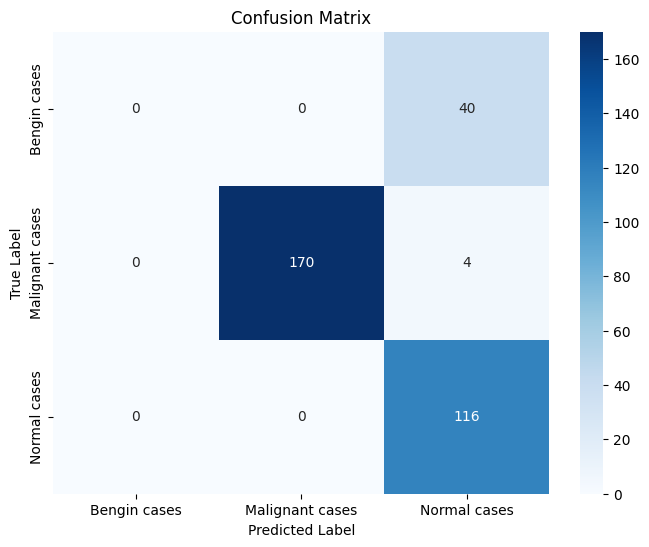


Training Decision Tree...
Accuracy: 0.9242
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.70      0.73        40
           1       0.98      0.99      0.99       174
           2       0.89      0.91      0.90       116

    accuracy                           0.92       330
   macro avg       0.88      0.86      0.87       330
weighted avg       0.92      0.92      0.92       330



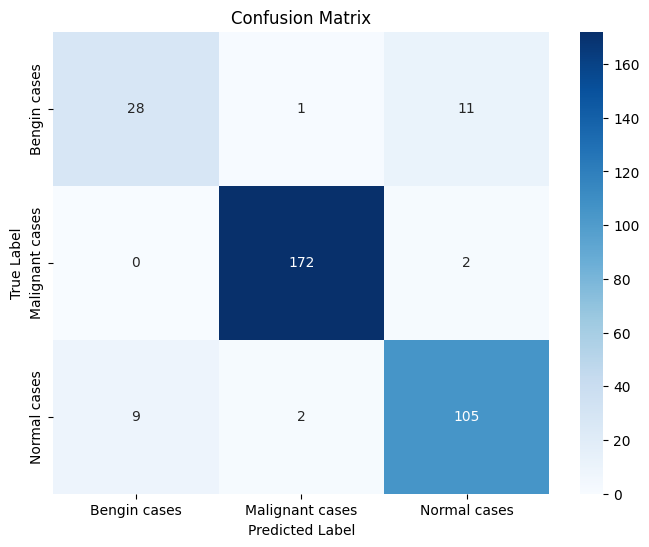


Training Random Forest...
Accuracy: 0.9485
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.70      0.81        40
           1       1.00      0.98      0.99       174
           2       0.88      0.99      0.93       116

    accuracy                           0.95       330
   macro avg       0.95      0.89      0.91       330
weighted avg       0.95      0.95      0.95       330



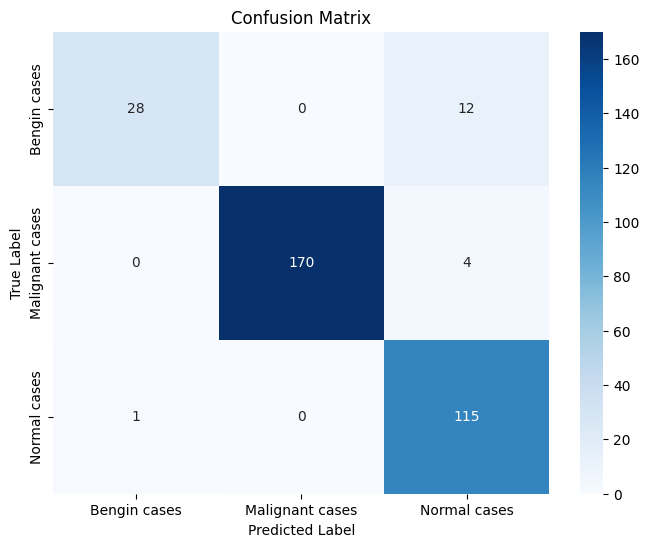


Training Gradient Boosting...
Accuracy: 0.9303
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.62      0.74        40
           1       1.00      0.97      0.99       174
           2       0.85      0.97      0.91       116

    accuracy                           0.93       330
   macro avg       0.91      0.86      0.88       330
weighted avg       0.93      0.93      0.93       330



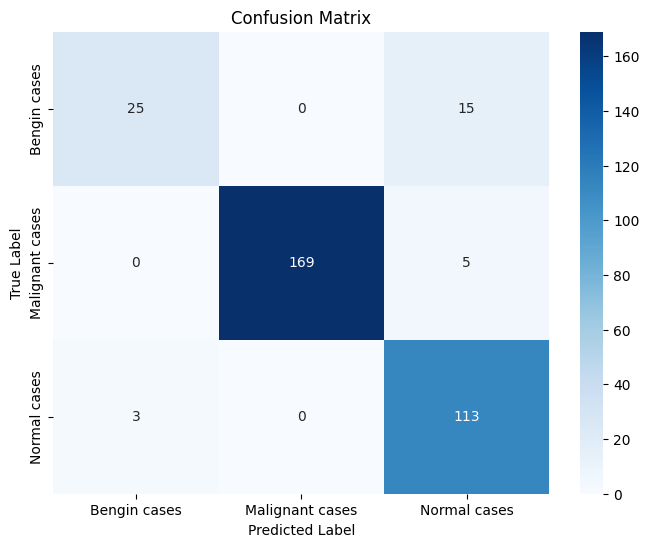


Training Support Vector Machine...
Accuracy: 0.8636
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.05      0.10        40
           1       1.00      0.96      0.98       174
           2       0.72      1.00      0.84       116

    accuracy                           0.86       330
   macro avg       0.91      0.67      0.64       330
weighted avg       0.90      0.86      0.82       330



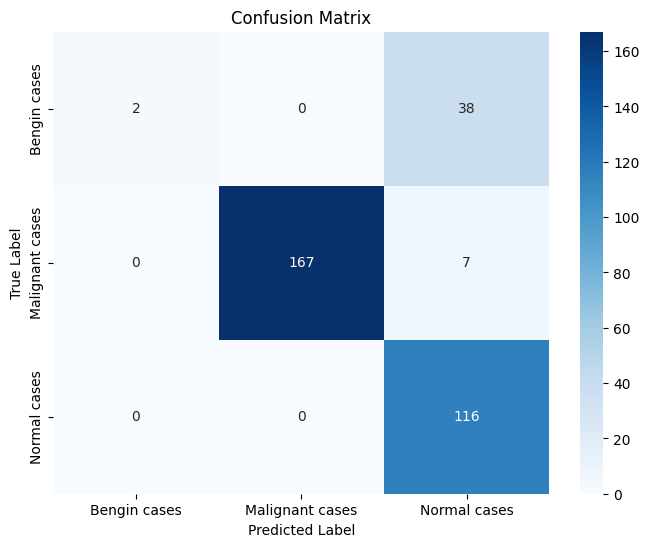


Training K-Nearest Neighbors...
Accuracy: 0.9424
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.57      0.71        40
           1       1.00      1.00      1.00       174
           2       0.87      0.98      0.92       116

    accuracy                           0.94       330
   macro avg       0.93      0.85      0.88       330
weighted avg       0.94      0.94      0.94       330



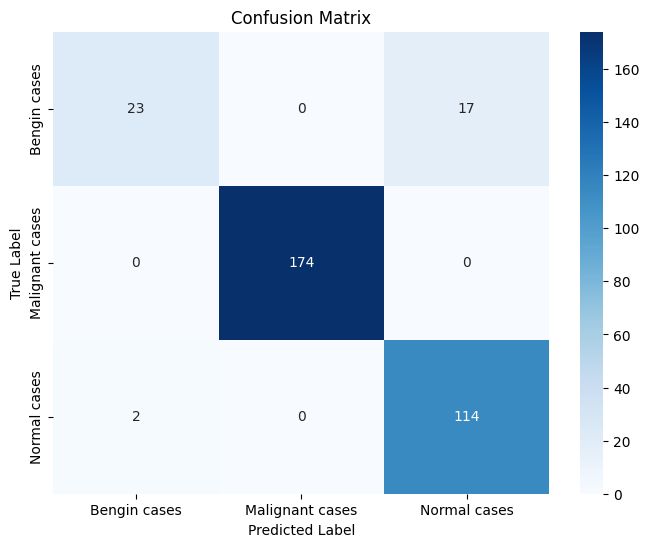


Training Naive Bayes...
Accuracy: 0.7030
Classification Report:
              precision    recall  f1-score   support

           0       0.28      0.93      0.44        40
           1       0.99      0.96      0.97       174
           2       0.90      0.24      0.38       116

    accuracy                           0.70       330
   macro avg       0.73      0.71      0.60       330
weighted avg       0.87      0.70      0.70       330



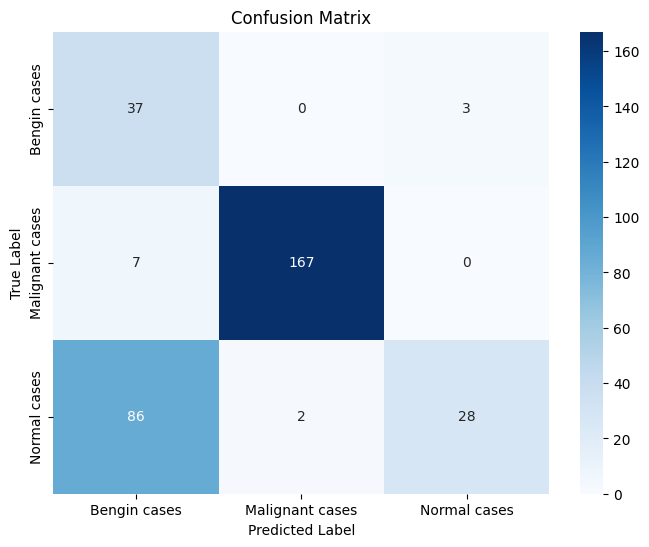


Best model: RandomForestClassifier with accuracy 0.9485


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns

def load_data(features_csv, all_features_csv):

    selected_features_df = pd.read_csv(features_csv)
    selected_features = selected_features_df['Feature'].values

    data_df = pd.read_csv(all_features_csv)

    return data_df, selected_features

def preprocess_data(df, selected_features):

    X = df[selected_features]
    y = df['Category']


    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled, y_encoded, label_encoder

def evaluate_model(model, X_train, X_test, y_train, y_test):

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    return accuracy

def plot_confusion_matrix(y_test, y_pred, label_encoder):

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

features_csv = '/content/selected_radiomic_features_rfe (1).csv'
all_features_csv = '/content/radiomic_features (3).csv'
df, selected_features = load_data(features_csv, all_features_csv)

X, y, label_encoder = preprocess_data(df, selected_features)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}


best_model = None
best_accuracy = 0
for model_name, model in models.items():          # Train and evaluate each model
    print(f"\nTraining {model_name}...")
    accuracy = evaluate_model(model, X_train, X_test, y_train, y_test)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

    # Plot the confusion matrix for each model
    y_pred = model.predict(X_test)
    plot_confusion_matrix(y_test, y_pred, label_encoder)

print(f"\nBest model: {best_model.__class__.__name__} with accuracy {best_accuracy:.4f}")
